# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
import urllib

In [10]:
# Import API key
from api_keys import weather_api_key

In [11]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
unit = 'Imperial'
url = f'https://api.openweathermap.org/data/2.5/weather?units={unit}&appid={weather_api_key}'

In [36]:
city_data = []

In [40]:
print('Beginning Data Retrieval')
print('------------------------')

# Create counters
record_count = 1
set_count = 1

# Loop through cities in the list
for i, city in enumerate(cities):
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL
    unit = 'Imperial'
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&units={unit}&appid={weather_api_key}'

    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    print(city_url)
    
    # Add 1 to counter
    record_count += 1
    
     # API request for each city
  #  try:
    city_weather = requests.get(city_url).json()
        
        # Max temp, humidity, cloudiness and wind speed
    try:
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append city information to city_data
        city_data.append({'City': city,
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
    # skip city
    except:
        print('City not found. Skipping...')
        pass

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | hami
https://api.openweathermap.org/data/2.5/weather?q=hami&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 2 of Set 1 | mwinilunga
https://api.openweathermap.org/data/2.5/weather?q=mwinilunga&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 3 of Set 1 | san francisco
https://api.openweathermap.org/data/2.5/weather?q=san francisco&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 4 of Set 1 | santa maria
https://api.openweathermap.org/data/2.5/weather?q=santa maria&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 5 of Set 1 | inhambane
https://api.openweathermap.org/data/2.5/weather?q=inhambane&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 6 of Set 1 | chokurdakh
https://api.openweathermap.org/data/2.5/weather?q=chokurdakh&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Rec

Processing Record 3 of Set 2 | bethel
https://api.openweathermap.org/data/2.5/weather?q=bethel&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 4 of Set 2 | bengkulu
https://api.openweathermap.org/data/2.5/weather?q=bengkulu&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 5 of Set 2 | can tho
https://api.openweathermap.org/data/2.5/weather?q=can tho&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 6 of Set 2 | bambous virieux
https://api.openweathermap.org/data/2.5/weather?q=bambous virieux&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 7 of Set 2 | oksbol
https://api.openweathermap.org/data/2.5/weather?q=oksbol&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 8 of Set 2 | anshun
https://api.openweathermap.org/data/2.5/weather?q=anshun&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 9 of Set 2 | hobart
https://api.openweathermap.org/data/2.5/weat

Processing Record 6 of Set 3 | touros
https://api.openweathermap.org/data/2.5/weather?q=touros&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 7 of Set 3 | pisco
https://api.openweathermap.org/data/2.5/weather?q=pisco&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 8 of Set 3 | guerrero negro
https://api.openweathermap.org/data/2.5/weather?q=guerrero negro&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 9 of Set 3 | kodiak
https://api.openweathermap.org/data/2.5/weather?q=kodiak&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 10 of Set 3 | husavik
https://api.openweathermap.org/data/2.5/weather?q=husavik&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 11 of Set 3 | sur
https://api.openweathermap.org/data/2.5/weather?q=sur&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 12 of Set 3 | goma
https://api.openweathermap.org/data/2.5/weather?q=goma&un

Processing Record 9 of Set 4 | rocky mountain house
https://api.openweathermap.org/data/2.5/weather?q=rocky mountain house&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 10 of Set 4 | kapaa
https://api.openweathermap.org/data/2.5/weather?q=kapaa&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 11 of Set 4 | nalut
https://api.openweathermap.org/data/2.5/weather?q=nalut&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 12 of Set 4 | keflavik
https://api.openweathermap.org/data/2.5/weather?q=keflavik&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 13 of Set 4 | srikakulam
https://api.openweathermap.org/data/2.5/weather?q=srikakulam&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 14 of Set 4 | batagay-alyta
https://api.openweathermap.org/data/2.5/weather?q=batagay-alyta&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 15 of Set 4 | nanortalik
https://

Processing Record 11 of Set 5 | atar
https://api.openweathermap.org/data/2.5/weather?q=atar&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 12 of Set 5 | mpulungu
https://api.openweathermap.org/data/2.5/weather?q=mpulungu&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 13 of Set 5 | shalakusha
https://api.openweathermap.org/data/2.5/weather?q=shalakusha&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 14 of Set 5 | banjar
https://api.openweathermap.org/data/2.5/weather?q=banjar&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 15 of Set 5 | huarmey
https://api.openweathermap.org/data/2.5/weather?q=huarmey&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 16 of Set 5 | altay
https://api.openweathermap.org/data/2.5/weather?q=altay&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 17 of Set 5 | nenzing
https://api.openweathermap.org/data/2.5/weather?q=ne

Processing Record 13 of Set 6 | skoghall
https://api.openweathermap.org/data/2.5/weather?q=skoghall&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 14 of Set 6 | kula
https://api.openweathermap.org/data/2.5/weather?q=kula&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 15 of Set 6 | eureka
https://api.openweathermap.org/data/2.5/weather?q=eureka&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 16 of Set 6 | iglesias
https://api.openweathermap.org/data/2.5/weather?q=iglesias&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 17 of Set 6 | seminole
https://api.openweathermap.org/data/2.5/weather?q=seminole&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 18 of Set 6 | pevek
https://api.openweathermap.org/data/2.5/weather?q=pevek&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 19 of Set 6 | kargopol
https://api.openweathermap.org/data/2.5/weather?q=kar

Processing Record 16 of Set 7 | liaocheng
https://api.openweathermap.org/data/2.5/weather?q=liaocheng&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 17 of Set 7 | cairns
https://api.openweathermap.org/data/2.5/weather?q=cairns&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 18 of Set 7 | fuerte olimpo
https://api.openweathermap.org/data/2.5/weather?q=fuerte olimpo&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 19 of Set 7 | sola
https://api.openweathermap.org/data/2.5/weather?q=sola&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 20 of Set 7 | los llanos de aridane
https://api.openweathermap.org/data/2.5/weather?q=los llanos de aridane&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 21 of Set 7 | san policarpo
https://api.openweathermap.org/data/2.5/weather?q=san policarpo&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 22 of Set 7 | salinopo

Processing Record 18 of Set 8 | praia
https://api.openweathermap.org/data/2.5/weather?q=praia&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 19 of Set 8 | ciudad real
https://api.openweathermap.org/data/2.5/weather?q=ciudad real&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 20 of Set 8 | lienz
https://api.openweathermap.org/data/2.5/weather?q=lienz&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 21 of Set 8 | hamilton
https://api.openweathermap.org/data/2.5/weather?q=hamilton&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 22 of Set 8 | buraydah
https://api.openweathermap.org/data/2.5/weather?q=buraydah&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 23 of Set 8 | yarada
https://api.openweathermap.org/data/2.5/weather?q=yarada&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 24 of Set 8 | hihifo
https://api.openweathermap.org/data/2.5/weather

Processing Record 21 of Set 9 | dingle
https://api.openweathermap.org/data/2.5/weather?q=dingle&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 22 of Set 9 | igrim
https://api.openweathermap.org/data/2.5/weather?q=igrim&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 23 of Set 9 | umzimvubu
https://api.openweathermap.org/data/2.5/weather?q=umzimvubu&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
City not found. Skipping...
Processing Record 24 of Set 9 | altayskoye
https://api.openweathermap.org/data/2.5/weather?q=altayskoye&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 25 of Set 9 | guelengdeng
https://api.openweathermap.org/data/2.5/weather?q=guelengdeng&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
City not found. Skipping...
Processing Record 26 of Set 9 | panguna
https://api.openweathermap.org/data/2.5/weather?q=panguna&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 27

Processing Record 24 of Set 10 | maloy
https://api.openweathermap.org/data/2.5/weather?q=maloy&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 25 of Set 10 | batticaloa
https://api.openweathermap.org/data/2.5/weather?q=batticaloa&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 26 of Set 10 | motril
https://api.openweathermap.org/data/2.5/weather?q=motril&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 27 of Set 10 | mwense
https://api.openweathermap.org/data/2.5/weather?q=mwense&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 28 of Set 10 | davila
https://api.openweathermap.org/data/2.5/weather?q=davila&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 29 of Set 10 | ouro fino
https://api.openweathermap.org/data/2.5/weather?q=ouro fino&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 30 of Set 10 | hukuntsi
https://api.openweathermap.org/data/2.5/

City not found. Skipping...
Processing Record 27 of Set 11 | macaboboni
https://api.openweathermap.org/data/2.5/weather?q=macaboboni&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
City not found. Skipping...
Processing Record 28 of Set 11 | vestbygda
https://api.openweathermap.org/data/2.5/weather?q=vestbygda&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
City not found. Skipping...
Processing Record 29 of Set 11 | hotaka
https://api.openweathermap.org/data/2.5/weather?q=hotaka&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 30 of Set 11 | sibolga
https://api.openweathermap.org/data/2.5/weather?q=sibolga&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 31 of Set 11 | micheweni
https://api.openweathermap.org/data/2.5/weather?q=micheweni&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 32 of Set 11 | hurghada
https://api.openweathermap.org/data/2.5/weather?q=hurghada&units=Imperial&appid=68b2a834481c54612

Processing Record 29 of Set 12 | muscle shoals
https://api.openweathermap.org/data/2.5/weather?q=muscle shoals&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 30 of Set 12 | opuwo
https://api.openweathermap.org/data/2.5/weather?q=opuwo&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 31 of Set 12 | aranos
https://api.openweathermap.org/data/2.5/weather?q=aranos&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 32 of Set 12 | havre-saint-pierre
https://api.openweathermap.org/data/2.5/weather?q=havre-saint-pierre&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 33 of Set 12 | caranavi
https://api.openweathermap.org/data/2.5/weather?q=caranavi&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 34 of Set 12 | bassar
https://api.openweathermap.org/data/2.5/weather?q=bassar&units=Imperial&appid=68b2a834481c546124ccee222fa7b6a3
Processing Record 35 of Set 12 | cherdyn
https://api.o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.to_csv('city_data.csv')

In [62]:
city_data = pd.read_csv('city_data.csv')
city_data.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,banihal,45.52,-122.68,46.00,94,100,10.07,US,1605408266
1,1,banihal,45.52,-122.68,46.00,94,100,10.07,US,1605408175
2,2,hami,42.80,93.45,43.38,55,3,2.75,CN,1605408553
3,3,mwinilunga,-11.74,24.43,61.81,96,100,0.85,ZM,1605408682
4,4,san francisco,37.77,-122.42,54.00,66,1,11.41,US,1605408682


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### 1) Latitude vs. Temperature Plot

In [69]:
city_data.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,banihal,45.52,-122.68,46.00,94,100,10.07,US,1605408266
1,1,banihal,45.52,-122.68,46.00,94,100,10.07,US,1605408175
2,2,hami,42.80,93.45,43.38,55,3,2.75,CN,1605408553
3,3,mwinilunga,-11.74,24.43,61.81,96,100,0.85,ZM,1605408682
4,4,san francisco,37.77,-122.42,54.00,66,1,11.41,US,1605408682


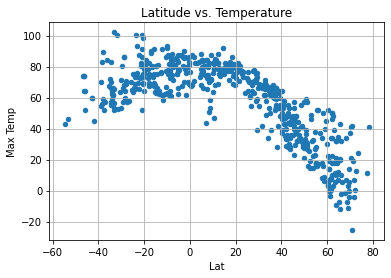

<Figure size 432x288 with 0 Axes>

In [136]:
# Create scatter plot to visualize the relationship between latitude and temperature
city_data.plot.scatter(x='Lat', y='Max Temp', title='Latitude vs. Temperature', grid=True)
plt.show()

plt.savefig('Latitude vs. Temperature Plot.png')

### Observation: The max temperatures tend to get higher as the cities' latitudes reach to 0.

### 2) Latitude vs. Humidity Plot

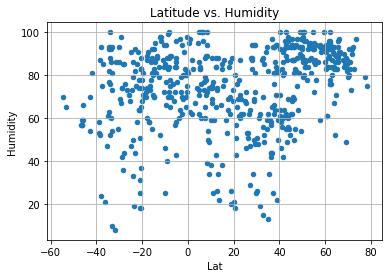

<Figure size 432x288 with 0 Axes>

In [137]:
city_data.plot.scatter(x='Lat', y='Humidity', title='Latitude vs. Humidity', grid=True)
plt.show()

plt.savefig('Latitude vs. Humidity Plot.png')

### Observation:
1. The humidity levels for the majority of cities are between 50-100, regardless of the latitudes. 

### 3) Latitude vs. Cloudiness Plot

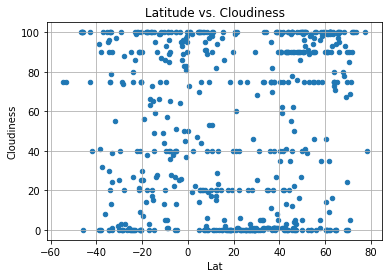

<Figure size 432x288 with 0 Axes>

In [138]:
# Create scatter plot to visualize the relation between latitude and cloudiness
city_data.plot.scatter(x='Lat', y='Cloudiness', title='Latitude vs. Cloudiness', grid=True)
plt.show()

plt.savefig('Latitude vs. Cloudiness Plot.png')

### Observation
1. Regardless of the latitudes, the cloudiness levels are scattered within the range of 0-100.
2. There are a good amount of cities with 0% cloudiness, but there are also fair amount of cities whose cloudiness levels are 100. 

### 3) Latitude vs. Wind Speed Plot

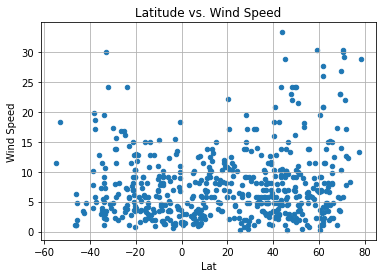

<Figure size 432x288 with 0 Axes>

In [139]:
# Create scatter plot to visualize the relation between latitude and wind speed
city_data.plot.scatter(x='Lat', y='Wind Speed', title='Latitude vs. Wind Speed', grid=True)
plt.show()

plt.savefig('Latitude vs. Wind Speed Plot.png')

### Observation:
The majority of wind speeds are between 0 to 20, regardless of the latitudes. 

## Linear Regression

In [89]:
city_data.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,banihal,45.52,-122.68,46.00,94,100,10.07,US,1605408266
1,1,banihal,45.52,-122.68,46.00,94,100,10.07,US,1605408175
2,2,hami,42.80,93.45,43.38,55,3,2.75,CN,1605408553
3,3,mwinilunga,-11.74,24.43,61.81,96,100,0.85,ZM,1605408682
4,4,san francisco,37.77,-122.42,54.00,66,1,11.41,US,1605408682


In [101]:
# Northern Hemisphere
filt1 = city_data['Lat'] >= 0
north = city_data.loc[filt1]

# Southern Hemisphere
filt2 = city_data['Lat'] < 0
south = city_data.loc[filt2]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

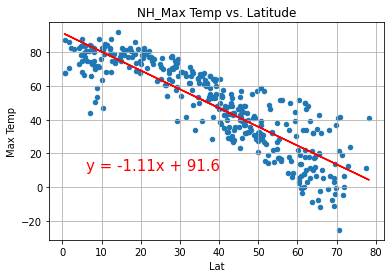

In [119]:
x_values = north['Lat']
y_values = north['Max Temp']

# Liner regression: return the following values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
north.plot.scatter(x='Lat', y='Max Temp', title='NH_Max Temp vs. Latitude', grid=True)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize=15, color='red')

plt.savefig('NH_Max Temp vs. Latitude.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

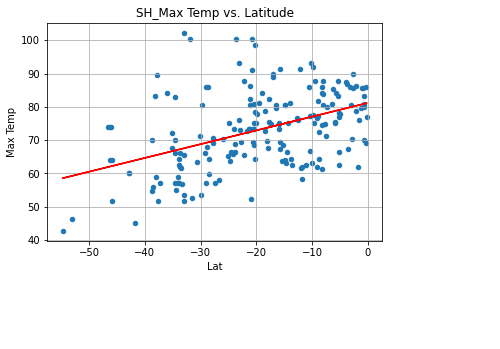

In [129]:
x_values = south['Lat']
y_values = south['Max Temp']

# Liner regression: return the following values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
south.plot.scatter(x='Lat', y='Max Temp', title='SH_Max Temp vs. Latitude', grid=True)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize=10, color='red')

plt.savefig('SH_Max Temp vs. Latitude.png')

### Observations:
1. In the northern hemisphere, there is negative relationhip between latitude and max temperature.
2. In the southern hemisphere, there is positive relationship between latitude and max temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

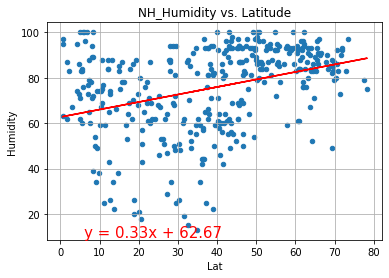

In [128]:
x_values = north['Lat']
y_values = north['Humidity']

# Liner regression: return the following values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
north.plot.scatter(x='Lat', y='Humidity', title='NH_Humidity vs. Latitude', grid=True)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize=15, color='red')

plt.show()

plt.savefig('NH_Humidity vs. Latitude.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

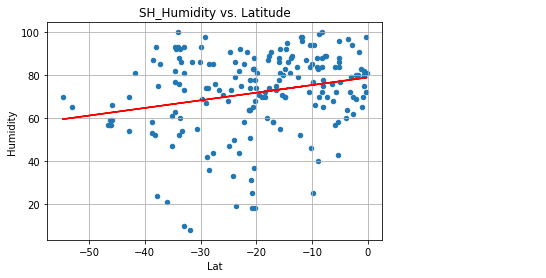

In [131]:
x_values = south['Lat']
y_values = south['Humidity']

# Liner regression: return the following values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
south.plot.scatter(x='Lat', y='Humidity', title='SH_Humidity vs. Latitude', grid=True)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize=15, color='red')

#plt.show()

plt.savefig('SH_Humidity vs. Latitude.png')

### Observations
1. In the northern hemisphere, there is positive relationship between latitude and humidity.
2. In the southern hemisphere, there is also positive relatinship between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

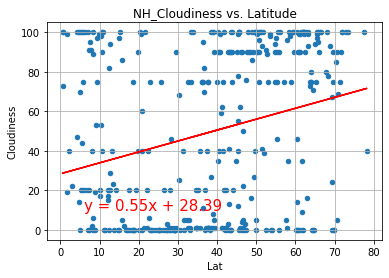

<Figure size 432x288 with 0 Axes>

In [132]:
x_values = north['Lat']
y_values = north['Cloudiness']

# Liner regression: return the following values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
north.plot.scatter(x='Lat', y='Cloudiness', title='NH_Cloudiness vs. Latitude', grid=True)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize=15, color='red')

plt.show()

plt.savefig('NH_Cloudiness vs. Latitude.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

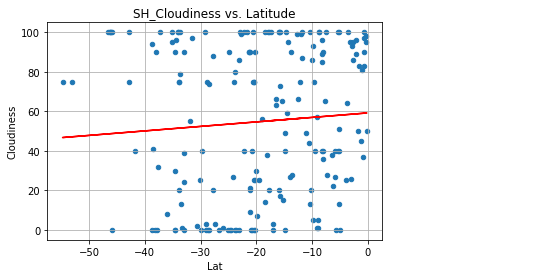

<Figure size 432x288 with 0 Axes>

In [133]:
x_values = south['Lat']
y_values = south['Cloudiness']

# Liner regression: return the following values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
south.plot.scatter(x='Lat', y='Cloudiness', title='SH_Cloudiness vs. Latitude', grid=True)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize=15, color='red')

plt.show()

plt.savefig('SH_Cloudiness vs. Latitude.png')

### Observations
1. In both northern hemisphere and southern hemisphere, there are positive relationship between cloudiness and latitude.
2. The positive relationship between cloudiness and latitude is higher in the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

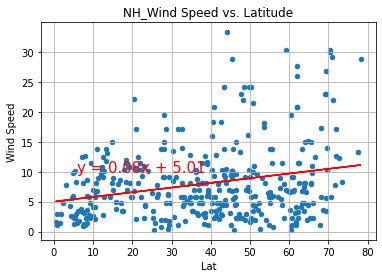

<Figure size 432x288 with 0 Axes>

In [134]:
x_values = north['Lat']
y_values = north['Wind Speed']

# Liner regression: return the following values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
north.plot.scatter(x='Lat', y='Wind Speed', title='NH_Wind Speed vs. Latitude', grid=True)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize=15, color='red')

plt.show()

plt.savefig('NH_Wind Speed vs. Latitude.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

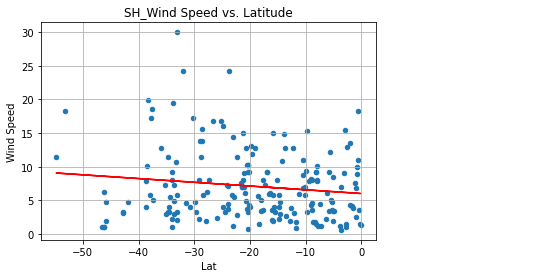

<Figure size 432x288 with 0 Axes>

In [135]:
x_values = south['Lat']
y_values = south['Wind Speed']

# Liner regression: return the following values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
south.plot.scatter(x='Lat', y='Wind Speed', title='SH_Wind Speed vs. Latitude', grid=True)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize=15, color='red')

plt.show()

plt.savefig('SH_Wind Speed vs. Latitude.png')

### Observation
1. In the northern hemisphere, there is positive relationship between wind speed and latitude.
2. In the southern hemisphere, there is negative relationship between wind speed and latitude.